In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("D:/dataset/WholesaleCustomersData.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
# Drop non-continuous variables
data.drop(["Channel", "Region"], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# going to use only two of these attributes
data = data[["Grocery", "Milk"]]

In [5]:
# normalize each attribute by scaling it to 0 mean and unit variance.
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)
#data

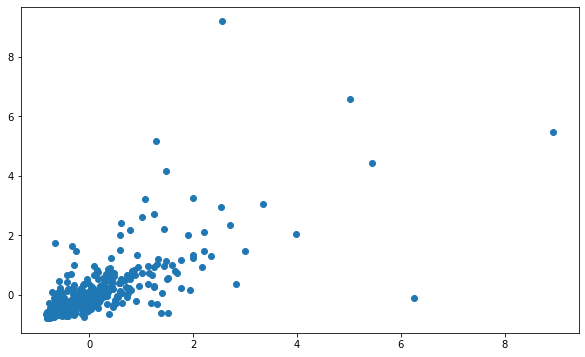

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], cmap='copper')

In [15]:
dbsc = DBSCAN(eps = .75, min_samples = 8).fit(data)
#dbsc.labels_

In [16]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [17]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 20


In [20]:
%matplotlib inline


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

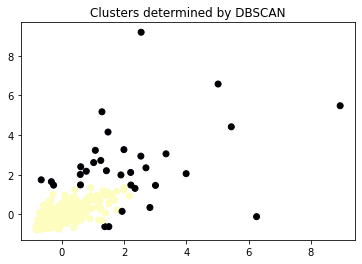

In [14]:
y_pred = dbsc.fit_predict(data)
plt.figure(figsize=(6,4))
plt.scatter(data[:,0], data[:,1],c=y_pred, cmap='magma')
plt.title("Clusters determined by DBSCAN")

In [21]:
from sklearn.datasets import make_moons

# generate 2d classification dataset
#noise  double or None (default=None).......Standard deviation of Gaussian noise added to the data.

moon_X, moon_y = make_moons(n_samples=2000, noise=0.05) 

print(moon_X)
print(moon_y)

[[ 0.03781101  1.02415164]
 [ 1.94024317  0.23980244]
 [ 0.78657345  0.68336603]
 ...
 [-0.78793025  0.48698149]
 [ 1.89860948  0.0349113 ]
 [-0.05630877  1.08409145]]
[0 1 0 ... 0 1 0]


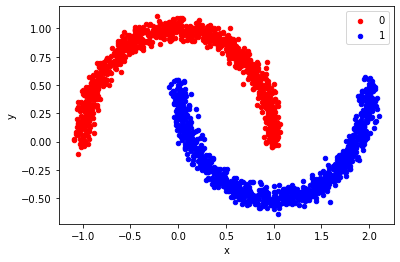

In [22]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=moon_X[:,0], y=moon_X[:,1], label=moon_y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [23]:
def add_noise(X,y, noise_level = 0.04):
    #The number of points we wish to make noisy
    amt_noise = int(noise_level*len(y))
    #Pick amt_noise points at random
    idx = np.random.choice(len(X), size = amt_noise)
    #Add random noise to these selected points
    noise = np.random.random((amt_noise, 2) ) -0.5
    X[idx,:] += noise
    return X 

moon_X=add_noise(moon_X,moon_y)

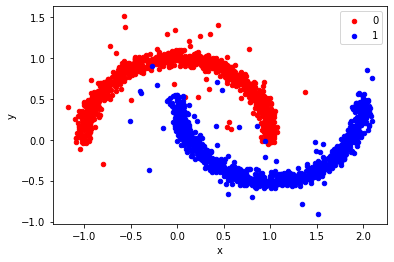

In [24]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=moon_X[:,0], y=moon_X[:,1], label=moon_y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [28]:
dbsc = DBSCAN(eps = .07, min_samples = 4).fit(moon_X)

In [29]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 51


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

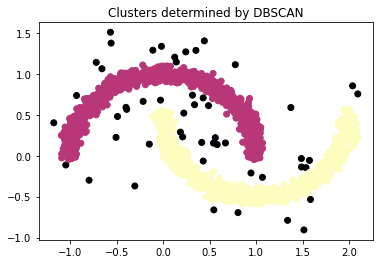

In [30]:
y_pred = dbsc.fit_predict(moon_X)
plt.figure(figsize=(6,4))
plt.scatter(moon_X[:,0], moon_X[:,1],c=y_pred, cmap='magma')
plt.title("Clusters determined by DBSCAN")

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(moon_X)
y_kmeans = kmeans.predict(moon_X)
y_kmeans

array([0, 1, 1, ..., 0, 1, 0])

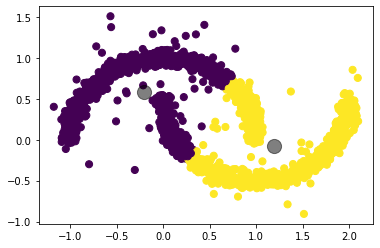

In [32]:
plt.scatter(moon_X[:, 0], moon_X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(moon_X)
y_kmeans = kmeans.predict(moon_X)
y_kmeans

array([2, 1, 2, ..., 0, 1, 2])

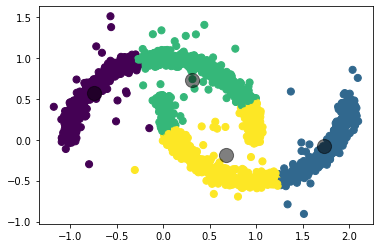

In [34]:
plt.scatter(moon_X[:, 0], moon_X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

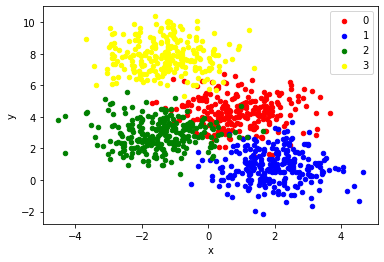

In [38]:
from sklearn.datasets import make_blobs

# generate 2d classification dataset
centers = [[-3.5, -2.1], [-1, 1], [1.6,1.8],[2.5,3.4]]
X, y = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=0)
# scatter plot, dots colored by class value
df =pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green',3:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [39]:
dbsc = DBSCAN(eps = .4, min_samples = 8).fit(X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 142


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

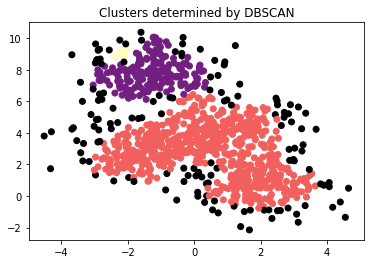

In [40]:
y_pred = dbsc.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='magma')
plt.title("Clusters determined by DBSCAN")

In [41]:
dbsc = DBSCAN(eps = .25, min_samples =6).fit(X)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 20
Estimated number of noise points: 399


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

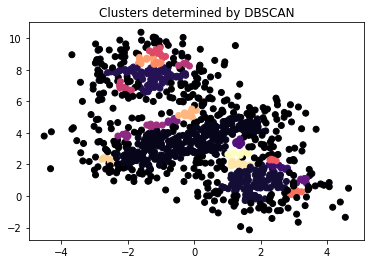

In [42]:
y_pred = dbsc.fit_predict(X)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='magma')
plt.title("Clusters determined by DBSCAN")